In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("/content/data.csv",encoding="latin1")
print(df.columns)


Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


/tmp/ipython-input-2484099492.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/data.csv", encoding="latin1")


In [13]:
x = df[no2_col].dropna().values
r = 102316060
a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)
print("a_r =", a_r)
print("b_r =", b_r)

a_r = 0.0
b_r = 0.3


In [4]:
z = x + a_r * np.sin(b_r * x)

In [14]:
print("Original NO2 Statistics")
print("Mean:",np.mean(x))
print("Variance:",np.var(x))

print("\nTransformed z Statistics")
print("Mean:",np.mean(z))
print("Variance:",np.var(z))


Original NO2 Statistics
Mean: 25.809622897811263
Variance: 342.36339017375917

Transformed z Statistics
Mean: 25.809622897811263
Variance: 342.36339017375917


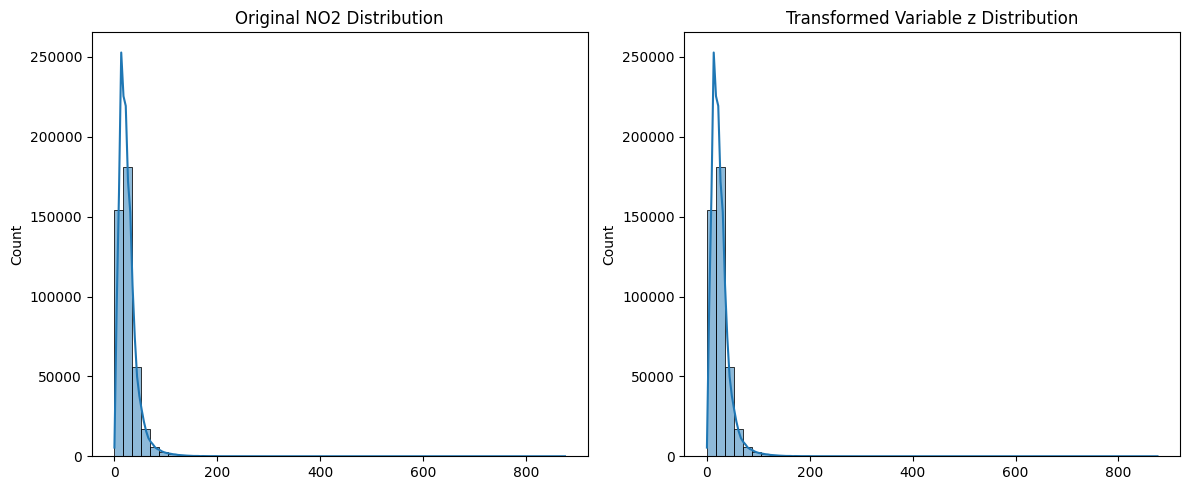

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x, bins=50,kde=True)
plt.title("Original NO2 Distribution")
plt.subplot(1,2,2)
sns.histplot(z,bins=50,kde=True)
plt.title("Transformed Variable z Distribution")
plt.tight_layout()
plt.show()

In [16]:
mu_hat = np.mean(z)
variance_hat =np.mean((z - mu_hat) ** 2)
lambda_hat =1/(2 * variance_hat)
norm_const =np.sqrt(lambda_hat / np.pi)
print("Estimated Parameters:")
print("μ=",mu_hat)
print("λ=",lambda_hat)
print("c=",norm_const)


Estimated Parameters:
μ= 25.809622897811263
λ= 0.001460436525489001
c= 0.021560876239314918


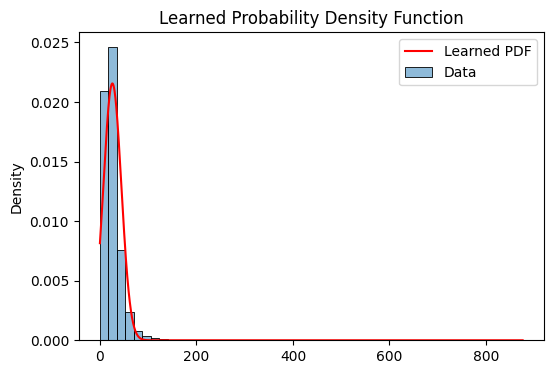

In [18]:
z_range=np.linspace(min(z), max(z),1500)
pdf = norm_const * np.exp(-lambda_hat*(z_range-mu_hat)**2)
plt.figure(figsize=(6, 4))
sns.histplot(z, bins=50, stat="density", alpha=0.5, label="Data")
plt.plot(z_range, pdf, 'r', label="Learned PDF")
plt.legend()
plt.title("Learned Probability Density Function")
plt.show()


In [20]:
z_alt = x + (a_r + 0.01)*np.sin(b_r *x)
print("Mean difference after small perturbation:",abs(np.mean(z)-np.mean(z_alt)))
print("Variance difference after small perturbation:",abs(np.var(z)-np.var(z_alt)))

Mean difference after small perturbation: 0.0003425591806092143
Variance difference after small perturbation: 0.0020071245936037485
